# Лабораторная работа №3: Регрессионный анализ
Выполнил студент гр. 1384 Прошичев Александр. Вариант №12

## Цель работы
Цель:\
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

1. Линейная регрессионная модель/
Линейная регрессия некоторой зависимой переменной $y$ на наборе независимых переменных $x = (x_1, …, x_n)$, где n – это число наблюдений, предполагает, что линейное отношение между $y$ и $x$: $y =\beta_0  + \beta_1 x_1 + ⋯ + \beta_n x_n + \varepsilon$ - уравнение регрессии. $\beta_0, \beta_1, …, \beta_n$ – коэффициенты регрессии (параметры), и $\varepsilon$ – случайная ошибка.


---

2. МНК (Метод Наименьших Квадратов)
$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$\
\
Нормальные уравнения: $XX^{\intercal}\beta=XY$\
Решение системы нормальных уравнений в регулярном случае: $\widehat{\beta}=(XX^{\intercal})^{-1}XY$\
\
$RSS(\beta)=\sum_{i=1}^{n}\left( Y_{i}-\sum_{j=1}^{m}x_{ji}\beta_{j} \right)^{2}$\
$\frac{\partial RSS}{\partial \beta_{k}} = -2\sum_{i=1}^{n}x_{ki}\left(Y_{i}- \sum_{j=1}^{m}x_{ji}\beta_{j}\right)=0, k=1...m$


---

3. Несмещённая оценка дисперсии $S^{2}$\
$\displaystyle S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$\
$SS_{e}=RSS(\widehat{\beta})$, а $r$ - ранг матрицы $X$



---

4. Доверительный интервал
ДНО функции:$\psi=C^{\intercal}\beta$\
МНК-оценка: $\widehat{\psi}=C^{\intercal}\beta$\
\
Элемент дисперсии оценки: $b_{\psi}=C^{\intercal}(XX^{\intercal})^{-1}C$\
Распределение $\widehat{\psi} \sim \mathcal{N}(\psi,\sigma^{2}b)$\
$\displaystyle \frac{\widehat{\psi}-\psi}{S\sqrt{b}} \sim \mathcal{S}_{n-r}$\
\
Доверительный интервал уровня доверия $1-\alpha: \left[ \widehat{\psi} - X_{\alpha}S\sqrt{b},\widehat{\psi} + X_{\alpha}S\sqrt{b} \right]$,\
где $\displaystyle X_{\alpha}: \mathcal{S}_{n-r}(X_{\alpha})=1-\frac{\alpha}{2}$



---

5. Уравнение доверительного эллипсоида\
$A_{\alpha}=\left\{ \vec{x}:(\vec{x}-\widehat{\psi})^{\intercal}B^{-1}(\vec{x}-\widehat{\psi}) \le qS^{2}x_{\alpha} \right\}$,\
где $\widehat{\psi}$ - вектор оценок параметров\
$B$ - матрица оценок ковариации\
$S^{2}$ - оценка дисперсии\
$q$ - пороговая точка, связанная с распределением $\chi^2_{n-r}$\
$x_{\\alpha}$ - значение функции распределения $\chi^2_{n-r}$ и уровнем доверия $1-\alpha$\



---



## Постановка задачи
1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.
2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h=1.20$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha=0.10$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.
3. В предположении нормальности ошибок построить доверительные интервалы для параметров  $\beta_0$ и  $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для ($\beta_0$, $\beta_1$) (вычислить его полуоси).
4. Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.
5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров  $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.
6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.
7. В предположении нормальности ошибок построить доверительные интервалы для параметров  $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$.
8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as spo

## Выполнение работы
### **1 задание**. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

Построим графически результаты эксперимента.


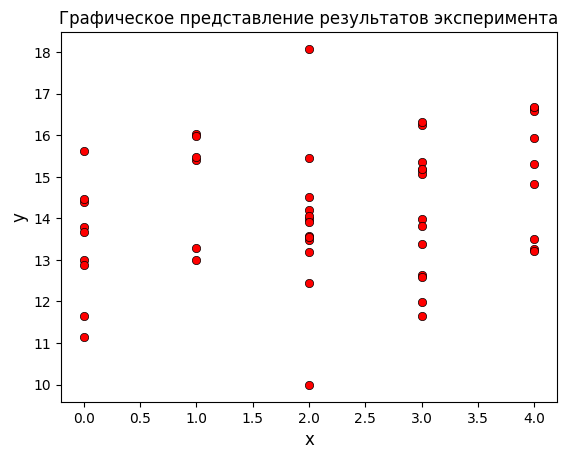

In [ ]:
X = np.array([3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4])
Y = np.array([11.66, 15.31, 14.39, 11.15, 13.57, 13.99, 13.38, 15.16, 12.99, 15.41, 14.20, 15.36, 12.44, 11.98, 11.65, 16.65, 15.62, 13.00, 13.80, 13.99, 13.48, 13.19, 14.82, 15.07, 15.45, 15.19, 16.26, 18.08, 14.05, 15.93, 13.68, 16.32, 13.27, 12.64, 16.59, 15.47, 9.99, 13.56, 13.82, 16.02, 15.99, 13.22, 14.46, 12.88, 14.52, 13.91, 13.50, 12.59, 13.28, 16.67])

plt.title('Графическое представление результатов эксперимента')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.scatter(X, Y, color='red', edgecolors='black', linewidths=0.5)
plt.show()

Записать модель линейной регрессии можно в следующим образом\
$ Y = X^T \beta + e  \quad \mathbb{E}_\theta e = 0 \quad Var_\theta e = \sigma^2 E$\
\
Составим систему нормальных уравнений\
$ X X^T \beta = X Y $\
\
Решение системы нормальных уравнений в регулярном случае\
$ \hat{\beta} = (X X^T)^{-1} XY $

In [ ]:
X = np.array([[1] * 50, [3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4]])
Y = np.array([11.66, 15.31, 14.39, 11.15, 13.57, 13.99, 13.38, 15.16, 12.99, 15.41, 14.20, 15.36, 12.44, 11.98, 11.65, 16.65, 15.62, 13.00, 13.80, 13.99, 13.48, 13.19, 14.82, 15.07, 15.45, 15.19, 16.26, 18.08, 14.05, 15.93, 13.68, 16.32, 13.27, 12.64, 16.59, 15.47, 9.99, 13.56, 13.82, 16.02, 15.99, 13.22, 14.46, 12.88, 14.52, 13.91, 13.50, 12.59, 13.28, 16.67])

XXT = np.dot(X, np.transpose(X))

XY = np.dot(X, Y)
b = np.dot(np.linalg.inv(XXT), XY)

print("b0:", round(b[0], 3), "b1:", round(b[1], 3))



b0: 13.584 b1: 0.284


МНК-оценки параметров
$ \hat{\beta} = \left( \begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \end{array} \right) = \left( \begin{array}{c} 13.584 \\ 0.284 \end{array} \right) $


Построим полученную линию регрессии и сравним её с исходными данными.

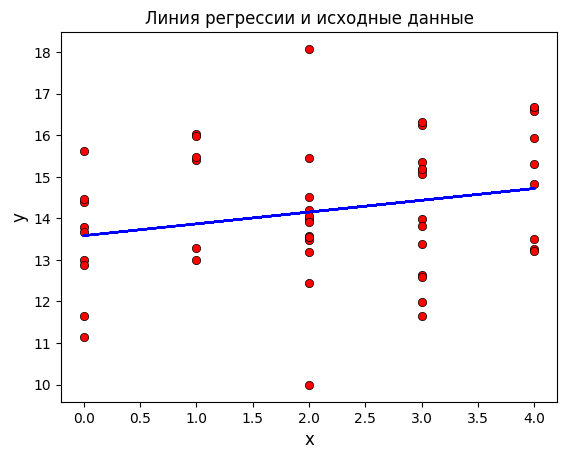

In [ ]:
X = np.array([[1] * 50, [3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4]])
Y = np.array([11.66, 15.31, 14.39, 11.15, 13.57, 13.99, 13.38, 15.16, 12.99, 15.41, 14.20, 15.36, 12.44, 11.98, 11.65, 16.65, 15.62, 13.00, 13.80, 13.99, 13.48, 13.19, 14.82, 15.07, 15.45, 15.19, 16.26, 18.08, 14.05, 15.93, 13.68, 16.32, 13.27, 12.64, 16.59, 15.47, 9.99, 13.56, 13.82, 16.02, 15.99, 13.22, 14.46, 12.88, 14.52, 13.91, 13.50, 12.59, 13.28, 16.67])
b = np.array([13.584, 0.284])

plt.title('Линия регрессии и исходные данные')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.scatter(X[1], Y, color='red', edgecolors='black', linewidths=0.5)
plt.plot(X[1], np.dot(np.transpose(X), b), '--b')
plt.show()

Анализируя визуальное отображение данных, можно отметить, что линия регрессии проходит через диапазон результатов эксперимента, причём её значение совпадает со средним значением результатов эксперимента, полученных при одинаковом X.

### **2 задание**. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h=1.20$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha=0.10$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещённая оценка дисперсии находится по формуле\
$ \displaystyle S^2 = \frac{RSS( \hat{\beta} )}{ n - r } = \frac{(Y - X^T \hat{\beta})^T (Y - X^T \hat{\beta})}{48} \approx 2.52$\
\
Корень из данной величины показывает MSE (mean square error), то есть среднеквадратичную ошибку модели по сравнению с результатами эксперимента. Квадрат работает таким образом, что ошибки больше единицы усиливаются, то есть становятся более значимыми по сравнению с ошибками меньше единицы. Поэтому данная величина начинает расти быстрее, если увеличиваются значения или количества больших ошибок.  \
\
Ответ получен в результате вычислений следующей программы


In [ ]:
X = np.array([[1] * 50, [3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4]])
Y = np.array([11.66, 15.31, 14.39, 11.15, 13.57, 13.99, 13.38, 15.16, 12.99, 15.41, 14.20, 15.36, 12.44, 11.98, 11.65, 16.65, 15.62, 13.00, 13.80, 13.99, 13.48, 13.19, 14.82, 15.07, 15.45, 15.19, 16.26, 18.08, 14.05, 15.93, 13.68, 16.32, 13.27, 12.64, 16.59, 15.47, 9.99, 13.56, 13.82, 16.02, 15.99, 13.22, 14.46, 12.88, 14.52, 13.91, 13.50, 12.59, 13.28, 16.67])
b = np.array([13.584, 0.284])

e = Y - np.dot(np.transpose(X), b) #ошибки

s2 = np.dot(np.transpose(e), e) / 48

print("Несмещённая оценка дисперсии =", round(s2, 3))


Несмещённая оценка дисперсии = 2.52


На базе ошибок построим гистограмму с шагом $1.20$.

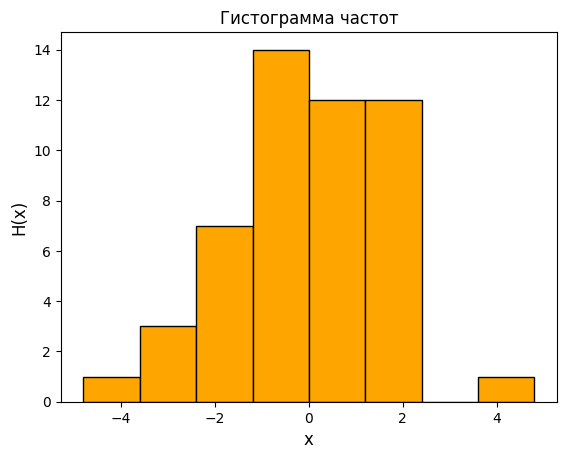

In [ ]:
plt.title('Гистограмма частот')
plt.xlabel('x', fontsize=12)
plt.ylabel('H(x)', fontsize=12)

counts, bins = np.histogram(e, bins=[i / 100 for i in range(-480, 481, 120)])
plt.hist(bins[:-1], edgecolor='black', weights=counts, bins=bins, color='orange')
plt.show()

Проверим гипотезу нормальности ошибок. Для начала проверим, распределены ли ошибки нормально с параметрами $ a = 0 $ и $ \sigma^2 = 2.52 $.

Таблица частот \
$ \begin{array}{|c|c|} \hline i & -3.6 & -2.4 & -1.2 & 0 & 1.2 & 2.4 & 3.6 & 4.8 \\ \hline \nu_i  & 1 & 3 & 7 & 14 & 12 & 12 & 0 & 1 \\ \hline
\end{array} $

Сгруппируем данные по интевалам.\
$ \begin{array}{|c|c|} \hline j & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\ \hline I_j & (-\infty, -3.6] & (-3.6, -2.4] & (-2.4, -1.2] & (-1.2, 0] & (0, 1.2] & (1.2, 3.6] & (3.6, +\infty) \\ \hline \nu_j  & 1 & 3 & 7 & 14 & 12 & 12 &  1  \\ \hline
\end{array} $ \
\
$ \measuredangle$ Основную гипотезу $H_0: Ф(I_j) = Ф_{(0, 2.52)}(I_j)$ для всех $j=1...7$ \
и альтернативную - $ H_А: {\exists j} \ Ф(I_j) \neq Ф_{(0, 2.52)}(I_j)$, где $ j=1...7 $\
\
Вычислим результаты и структурируем их в таблице \
$ \begin{array}{|c|c|} \hline I_j & \nu_j & p_{j0} & \frac{\large \left( \nu_j -np_{j0} \right)^2}{\large np_{j0}}\\ \hline (-\infty, -3.6] & 1 & 0.01167 & 0.297 \\ \hline (-3.6, -2.4] & 3 &  0.05361 &  0.038\\ \hline (-2.4, -1.2] & 7 & 0.15956 & 0.12\\ \hline (-1.2, 0] & 14 & 0.27515 & 0.004 \\ \hline (0, 1.2] & 12 & 0.27515 & 0.225 \\ \hline (1.2, 3.6] & 12 & 0.21317 & 0.169 \\ \hline (3.6, +\infty) & 1 & 0.01167 & 0.297 \\ \hline \end{array} $ \
\
$ \chi^2 = 1.15$\
\
Расчёты получены в результате следующей программы



In [ ]:
def CuclSum(a, g):
  arr = [-3.6, -2.4, -1.2, 0, 1.2, 3.6]
  res = [0] * (len(arr) + 1)

  #Вычисление p_j0
  res[0] = sps.norm.cdf(-3.6, a, g)

  for i in range(1, len(arr)):
    res[i] = sps.norm.cdf(arr[i], a, g) - sps.norm.cdf(arr[i - 1], a, g)
  res[len(arr)] = 1 - sps.norm.cdf(3.6, a, g)
  res = [round(elem, 5) for elem in res]
  print("p_j0 =", res)
  print("Проверка результата. Сумма p_j0 =", round(sum(res), 3))

  #Вычисление X^2
  v = [1, 3, 7, 14, 12, 12, 1]
  ans = [(v[i] - 50 * res[i]) ** 2 / (50 * res[i]) for i in range(len(v))]
  ans = [round(elem, 3) for elem in ans]
  print("Последний столбец =", ans)

  return sum(ans)

print("X^2 =", round(CuclSum(0, 2.52 ** 0.5), 3))

p_j0 = [0.01167, 0.05361, 0.15956, 0.27515, 0.27515, 0.21317, 0.01167]
Проверка результата. Сумма p_j0 = 1.0
Последний столбец = [0.297, 0.038, 0.12, 0.004, 0.225, 0.169, 0.297]
X^2 = 1.15


$ x_{a} : \mathcal{K}_{r-1}(x_a) = \mathcal{K}_6(x_a) = 1 - \alpha = 1 - 0.1 = 0.9$

In [ ]:
fx = 0.9
x_a = sps.chi2.ppf(fx, 6)

print("Квантиль x_a =", round(x_a, 3))
print("Функция распределения K_6(x_a) =", sps.chi2.cdf(x_a, 6))

Квантиль x_a = 10.645
Функция распределения K_6(x_a) = 0.9


Т.к. $\chi^2 < x_\alpha$ , то гипотеза принимается. Значит можем предполагать, что $ e_1...e_n \sim \mathcal{N}(0, 2.52)$ с уровнем доверия $ 1 - \alpha. $\
Найдём наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу. Пусть $\mathbb{P}(\chi^2 \leq x_\alpha) = 0$\
Тогда $ \chi^2 \leq x_\alpha \implies \chi^2 \leq \mathcal{K}_{6}^{-1}(1 - \alpha) \implies \mathcal{K}_{6}(\chi^2) \leq 1 - \alpha \implies \alpha \leq 1 - \mathcal{K}_{6}(\chi^2)$



In [ ]:
chi2 = 1.15
print("Наибольшее значение уровня значимости =", round(1 - sps.chi2.cdf(chi2, 6), 3))

Наибольшее значение уровня значимости = 0.979


Для оценки расстояния до класса нормальных распределений по Колмогорову рассмотрим следующие гипотезы.\
Основаня гипотеза $ H_0 : e_1...e_n \sim \mathcal{N}(0, 2.52) $\
Альтернативная гипотеза $ H_А : e_1...e_n$ не распределена, как $\mathcal{N}(0, 2.52) $

Статистика критерия Колмогорова $ \widehat{D_n} = max| e_x - Ф_{(0, 2.52)}(x) | $. Построим критерий Колмогорова.\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq x_\alpha  \\ 1, \quad \widehat{D_n} > x_\alpha \end{cases}$, где $ x_\alpha: \mathcal{K_n}(x_\alpha) = 1 - \alpha = 0.9 $\
\
Найдём $ x_a $  


In [ ]:
fx = 0.9
x_a = sps.ksone.ppf(fx, 50)


print("При квантиле x_a =", round(x_a, 3))
print("Функция распределения Колмогорова K_50(x_a) =", round(sps.ksone.cdf(x_a, 50), 3))

При квантиле x_a = 0.148
Функция распределения Колмогорова K_50(x_a) = 0.9


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.148  \\ 1, \quad \widehat{D_n} > 0.148 \end{cases}$

Найдём $\widehat{D_n}$

In [ ]:
def Fn(x):
  e = [-2.776,  0.59,   0.806, -2.434, -0.582, -0.446, -1.056,  0.724, -0.878,  1.542, 0.048,  0.924, -1.712, -2.456, -1.934,  1.93,   2.036, -0.584,  0.216, -0.162, -0.672, -0.962,  0.1,    0.634,  1.298,  0.754,  1.824,  3.928, -0.102,  1.21, 0.096,  1.884, -1.45,  -1.796,  1.87,   1.602, -4.162, -0.592, -0.616,  2.152,  2.122, -1.5,    0.876, -0.704,  0.368, -0.242, -1.22,  -1.846, -0.588,  1.95]

  sm = 0
  for i in range(50):
    if e[i] < x:
      sm += 1
  return sm / 50

x_val = np.arange(-5, 5, 0.001)

Dn_array = [abs(Fn(x) - sps.norm.cdf(x, 0, 2.52 ** 0.5)) for x in x_val]

print("Статистика Dn =", round(max(Dn_array) * 50 ** 0.5, 3))

Статистика Dn = 0.478


Т.к. $\widehat{D_n} > x_\alpha$, гипотеза $H_0$ отвергается.\
Найдём наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу. Пусть $\mathbb{P}(D_n \leq x_\alpha) = 0$\
Тогда $ D_n \leq x_\alpha \implies D_n \leq \mathcal{K}_{50}^{-1}(1 - \alpha) \implies \mathcal{K}_{50}(D_n) \leq 1 - \alpha \implies \alpha \leq 1 - \mathcal{K}_{50}(D_n)$


In [ ]:
Dn = 0.478
print("Наибольшее значение уровня значимости =", 1 - sps.ksone.cdf(Dn, 50))

Наибольшее значение уровня значимости = 2.5257240743314924e-11


Визуально покажем оценку расстояния.

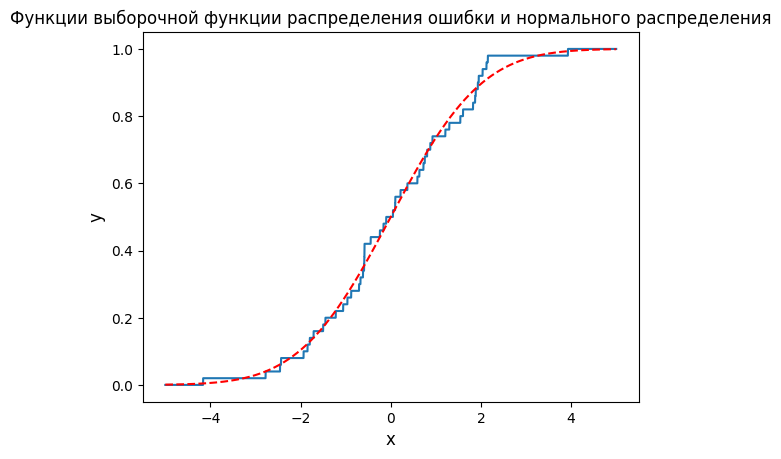

In [ ]:
def Fn(x):
  e = [-2.776,  0.59,   0.806, -2.434, -0.582, -0.446, -1.056,  0.724, -0.878,  1.542, 0.048,  0.924, -1.712, -2.456, -1.934,  1.93,   2.036, -0.584,  0.216, -0.162, -0.672, -0.962,  0.1,    0.634,  1.298,  0.754,  1.824,  3.928, -0.102,  1.21, 0.096,  1.884, -1.45,  -1.796,  1.87,   1.602, -4.162, -0.592, -0.616,  2.152,  2.122, -1.5,    0.876, -0.704,  0.368, -0.242, -1.22,  -1.846, -0.588,  1.95]

  sm = 0
  for i in range(50):
    if e[i] < x:
      sm += 1
  return sm / 50

x_val = np.arange(-5, 5, 0.001)
y_err = [Fn(x) for x in x_val]
y_norm = [sps.norm.cdf(x, 0, 2.52 ** 0.5) for x in x_val]

plt.title('Функции выборочной функции распределения ошибки и нормального распределения')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.plot(x_val, y_err)
plt.plot(x_val, y_norm, '--r')
plt.show()

Анализируя получившийся график, можно сказать, что в среднем расстояние между рассматриваемыми функциями распределения достаточно мало, но в окрестности x = 2 есть резкое расхождение, которое и даёт максимум разности, вследствие чего гипотеза отвергается.

### **3 задание.** В предположении нормальности ошибок построить доверительные интервалы для параметров  $\beta_0$ и  $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для ($\beta_0$, $\beta_1$) (вычислить его полуоси).

Для построения доверительного интервала воспользуемся фактом, что $\displaystyle \frac{\hat{\psi} - \psi}{s \sqrt{b}} \sim S_{n - r} $, где\
$ \hat{\psi} = C^T \hat{\beta} \quad b_\psi = C^T (X X^T)^{-1} C$. $C$ - матрица для опеределения параметров, которые будут оценены. В случае, если нужно оценить каждый параметр отдельно, берутся $ C_0 = \left( \begin{array}{c} 1 \\ 0 \end{array} \right) \quad$  и$\quad C_1 = \left( \begin{array}{c} 0 \\ 1 \end{array} \right) $ \
$ \hat{\psi_0} = \left( \begin{array}{c} 1 & 0 \end{array} \right) \left( \begin{array}{c} 13.584 \\ 0.284 \end{array} \right) = 13.584 $\
\
$ \hat{\psi_1} = \left( \begin{array}{c} 0 & 1 \end{array} \right) \left( \begin{array}{c} 13.584 \\ 0.284 \end{array} \right) = 0.284 $\
\
$b_{\psi_0} = C_0^T (X X^T)^{-1} C_0 = 0.071$\
$b_{\psi_1} = C_1^T (X X^T)^{-1} C_1 = 0.011$\
\
Полученные результаты вычисляются следующей программой

In [ ]:
X = np.array([[1] * 50, [3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4]])

XXT = np.dot(X, np.transpose(X))

#Вычисление b_psi0
C0 = np.array([1, 0])
bp0 = np.dot(np.dot(np.transpose(C0), np.linalg.inv(XXT)), C0)
print("b_psi0 =",  round(bp0, 3))

#Вычисление b_psi1
C1 = np.array([0, 1])
bp1 = np.dot(np.dot(np.transpose(C1), np.linalg.inv(XXT)), C1)
print("b_psi1 =", round(bp1, 3))

b_psi0 = 0.071
b_psi1 = 0.011


Тогда доверительный интервал будет выглядеть, как\
$ \psi \in \left[ \hat{\psi} - x_\alpha S \sqrt{b_\psi}, \hat{\psi} + x_\alpha S \sqrt{b_\psi} \right] $, где $\displaystyle x_\alpha : S_{n - r} = S_{48} = 1 - \frac{\alpha}{2} =  0.95$

In [ ]:
fx = 0.95
x_a = sps.t.ppf(fx, 48)


print("При квантиле x_a =", round(x_a, 3))
print("Функция распределения S_48(x_a) =", round(sps.t.cdf(x_a, 48), 3))

При квантиле x_a = 1.677
Функция распределения S_48(x_a) = 0.95


Найдём доверительный интервал для $\beta_0$ и для $\beta_1$.

In [ ]:
print("Доверительный интервал b0 от", round(13.584 - 1.677 * (2.52 * 0.071) ** 0.5, 3), "до", round(13.584 + 1.677 * (2.52 * 0.071) ** 0.5, 3))
print("Доверительный интервал b1 от", round(0.284 - 1.677 * (2.52 * 0.011) ** 0.5, 3), "до", round(0.284 + 1.677 * (2.52 * 0.011) ** 0.5, 3))

Доверительный интервал b0 от 12.875 до 14.293
Доверительный интервал b1 от 0.005 до 0.563


$ \beta_0 \in \left[ 12.875, 14.293 \right] $\
$ \beta_1 \in \left[ 0.005, 0.563 \right] $


Построим доверительный эллипс для параметров $( \beta_0, \beta_1 )$.\
$ A_\alpha = \{ \vec{x} : ( \vec{x} - \hat{\psi} )^T B^{-1} ( \vec{x} - \hat{\psi} ) \leq q S^2 x_\alpha \} $, где $ q = dim(\vec{x}); \quad x_\alpha : \mathcal{F_{q,n-r}}(x_\alpha) = 1 - \alpha; \quad B = C^T (X X^T)^{-1} C$\
Для построение требуемого эллипса берём матрицу $C = \left( \begin{array}{c} 1 & 0 \\ 0 & 1 \end{array} \right) = E$.\
Тогда матрица $B = (X X^T)^{-1} \implies B^{-1} = X X^T$\
\
Найдём $x_\alpha$


In [ ]:
fx = 0.9
x_a = sps.f.ppf(fx, 2, 48)


print("При квантиле x_a =", round(x_a, 3))
print("Функция распределения Фишера-Синдекора F_2_48(x_a) =", round(sps.f.cdf(x_a, 2, 48), 3))

При квантиле x_a = 2.417
Функция распределения Фишера-Синдекора F_2_48(x_a) = 0.9


In [ ]:
b0_val = []
b1_val = []

for b0 in np.arange(-5, 20, 0.01):
  for b1 in np.arange(-5, 5, 0.01):
    x = np.array([b0, b1])
    psi = np.array([13.584, 0.284])
    X = np.array([[1] * 50, [3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4]])
    q = 2
    S2 = 2.52
    x_a = 2.417

    x_psi = x - psi
    XXT = np.dot(X, np.transpose(X))

    if np.dot(np.dot(np.transpose(x_psi), XXT), x_psi) <= q * S2 * x_a:
      b0_val.append(round(b0, 3))
      b1_val.append(round(b1, 3))



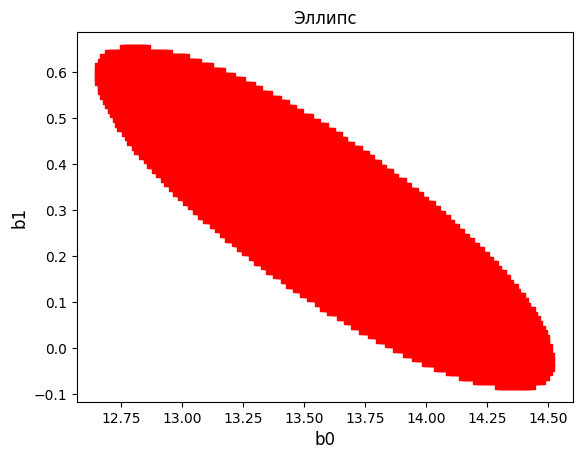

In [ ]:
plt.title('Эллипс')
plt.xlabel('b0', fontsize=12)
plt.ylabel('b1', fontsize=12)
plt.scatter(b0_val, b1_val, marker=',', color='red')
plt.show()

Приведём уравнение эллипса к каноническому виду для нахождения полуосей.
$(\vec{x} - \hat{\psi} )^T B^{-1} ( \vec{x} - \hat{\psi} ) = \left( \left( \begin{array}{c} \beta_0 \\ \beta_1 \end{array} \right) - \left( \begin{array}{c} 13.584 \\ 0.284 \end{array} \right) \right)^T X X^T \left( \left( \begin{array}{c} \beta_0 \\ \beta_1 \end{array} \right) - \left( \begin{array}{c} 13.584 \\ 0.284 \end{array} \right) \right)$\
$= \left( \begin{array}{c} \beta_0 -  13.584 \\ \beta_1 - 0.284 \end{array} \right)^T \left( \begin{array}{c} 50 & 107 \\ \ 107 & 319 \end{array} \right) \left( \begin{array}{c} \beta_0 -  13.584 \\ \beta_1 - 0.284 \end{array} \right)$\
\
Тогда получим следующее выражение\
$ 50 (\beta_0 - 13.584)^2 + 2 * 107(\beta_0 - 13.584)(\beta_1 - 0.284) + 319(\beta_1 - 0.284)^2 $\
\
Пусть $ \beta_0 - 13.584 = \bar{\beta_0} \quad \beta_1 - 0.284 = \bar{\beta_1} $\
$50 \bar{\beta_0}^2 + 2 * 107 \bar{\beta_0} \bar{\beta_1} + 319 \bar{\beta_1}^2$\
\
Воспользуемся методом Лагранжа для приведения выражения к каноническому виду.\
$ 50( \bar{\beta_0}^2 + 2 \bar{\beta_0} (\frac{107}{50} \bar{\beta_1}) + (\frac{107}{50} \bar{\beta_1})^2 - (\frac{107}{50} \bar{\beta_1})^2) + 319 \bar{\beta_1}^2 =$\
$ 50(\bar{\beta_0} + \frac{107}{50} \bar{\beta_1})^2 + 90.02 \bar{\beta_1}^2 $\
\
Пусть $ \bar{\beta_0} + \frac{107}{50} \bar{\beta_1} = x \quad \bar{\beta_1} = y $. Тогда изначальное неравенство примет вид\
$ 50x^2 + 90.02y^2 \leq 12.182 \implies 4.104 x^2 + 7.39 y^2 \leq 1$\
P.S. И тут я понял, что данное преобразование уничтожает длины. Нужно использовать ортогональное.\
\
Воспользуемся ортогональным преобразованием (таким образом сохраним длины и скалярные произведения).\
 Перепишем коэффициенты квадратичной формы $50 \bar{\beta_0}^2 + 2 * 107 \bar{\beta_0} \bar{\beta_1} + 319 \bar{\beta_1}^2$ в матрицу.\
Данная форма сохраняет первоначальные длины, потому что был применён только параллельный перенос в начало координат.\
$ A = \left( \begin{array}{c} 50 & 107 \\ 107 & 319 \end{array} \right) $\
\
Найдём собственные числа.\
$ \left| \begin{array}{c} 50 - \lambda & 107 \\ 107 & 319 - \lambda \end{array} \right| = 0$\
\
$ 12.63x^2 + 356.37y^2 \leq 12.182$\
$ 1.04x^2 +  29.25y^2 \leq 1$\
\
Большая полуось\
$ a = \frac{1}{\sqrt{1.04}} = 0.98$
\
Малая полуось\
$ b = \frac{1}{\sqrt{29.25}} = 0.185$




### **4 задание.** Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

Y не зависит от X, если $ y_i \approx \beta_0 + \beta_1 x_i = \beta_0 $\
То есть $ \beta_1 = 0 $

ДНО-функция $ \psi = C^T \beta $. Выделим параметр $ \beta_1 $\
$ C = \left( \begin{array}{c} 0 \\ 1 \end{array} \right) \implies \psi = \left( \begin{array}{c} 0 & 1 \end{array} \right) \left( \begin{array}{c} \beta_0 \\ \beta_1 \end{array} \right) = \beta_1$\
\
Рассмотрим основную гипотезу $ H_0: \psi = 0 \ ( \beta_1 = 0) $\
Тогда статистика будет выглядеть, как\
$\displaystyle \mathbb{F} = \frac{\hat{\psi}^T (C^T (X X^T)^{-1} C)^{-1} \hat{\psi}}{q S^2} \sim \mathcal{F}_{q, n-r} $,\
где $ x_\alpha : F_{q, n-r}(x_\alpha) = 1 - \alpha = 0.9 $\
\
Найдём $x_\alpha$


In [ ]:
fx = 0.9
x_a = sps.f.ppf(fx, 1, 48)


print("При квантиле x_a =", round(x_a, 3))
print("Функция распределения Фишера-Синдекора F_2_48(x_a) =", round(sps.f.cdf(x_a, 1, 48), 3))

При квантиле x_a = 2.813
Функция распределения Фишера-Синдекора F_2_48(x_a) = 0.9


Построим критерий\
$ \varphi = \begin{cases} 0 \quad \mathbb{F} \leq 2.813 \\ 1 \quad \mathbb{F} > 2.813 \end{cases} $\
\
Найдём статистику $ \mathbb{F} $\
\
МНК-оценка $ \hat{\psi} = C^T \hat{\beta} = \left( \begin{array}{c} 0 & 1 \end{array} \right) \left( \begin{array}{c} 13.584 \\ 0.284 \end{array} \right) = 0.284$


In [ ]:
C = np.array([0, 1])
psi_hat = 0.284
X = np.array([[1] * 50, [3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4]])
q = 2
S2 = 2.52

XXT = np.dot(X, np.transpose(X))
CTXXTC = np.dot(np.dot(np.transpose(C), np.linalg.inv(XXT)) , C)
print("Статистика F =", round(psi_hat * psi_hat / (CTXXTC * q * S2), 3) )

Статистика F = 1.441


Т.к. $\mathbb{F} < x_\alpha$, гипотеза $H_0$ принимается.\
Найдём наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу. Пусть $\mathbb{P}(\mathbb{F} \leq x_\alpha) = 0$\
Тогда $ \mathbb{F} \leq x_\alpha \implies \mathbb{F} \leq \mathcal{F}_{1, 48}^{-1}(1 - \alpha) \implies \mathcal{F}_{1, 48}(\mathbb{F}) \leq 1 - \alpha \implies \alpha \leq 1 - \mathcal{F}_{1, 48}(\mathbb{F})$


In [ ]:
F = 1.441
print("Наибольшее значение уровня значимости =", round(1 - sps.f.cdf(F, 1, 48), 3))

Наибольшее значение уровня значимости = 0.236


### **5 задание.** Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров  $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Записать модель линейной регрессии можно в следующим образом\
$ Y = X^T \beta + e  \quad \mathbb{E}_\theta e = 0 \quad Var_\theta e = \sigma^2 E$\
Теперь $\beta = (\beta_0 \quad \beta_1 \quad \beta_2 )^T$\
\
Составим систему нормальных уравнений\
$ X X^T \beta = X Y $\
\
Решение системы нормальных уравнений в регулярном случае\
$ \hat{\beta} = (X X^T)^{-1} XY $

In [ ]:
X_val = np.array([3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4])
X = np.array([[1] * 50, X_val, X_val**2])
Y = np.array([11.66, 15.31, 14.39, 11.15, 13.57, 13.99, 13.38, 15.16, 12.99, 15.41, 14.20, 15.36, 12.44, 11.98, 11.65, 16.65, 15.62, 13.00, 13.80, 13.99, 13.48, 13.19, 14.82, 15.07, 15.45, 15.19, 16.26, 18.08, 14.05, 15.93, 13.68, 16.32, 13.27, 12.64, 16.59, 15.47, 9.99, 13.56, 13.82, 16.02, 15.99, 13.22, 14.46, 12.88, 14.52, 13.91, 13.50, 12.59, 13.28, 16.67])

XXT = np.dot(X, np.transpose(X))

XY = np.dot(X, Y)
b = np.dot(np.linalg.inv(XXT), XY)

print("b0:", round(b[0], 3), "b1:", round(b[1], 3), "b2:", round(b[2], 3))



b0: 13.716 b1: 0.03 b2: 0.065


МНК-оценки параметров
$ \hat{\beta} = \left( \begin{array}{c} \hat\beta_0 \\ \hat\beta_1 \\ \hat\beta_2 \end{array} \right) = \left( \begin{array}{c} 13.716 \\ 0.03 \\ 0.065 \end{array} \right) $\
\
Построим полученную линию регрессии и сравним её с исходными данными.


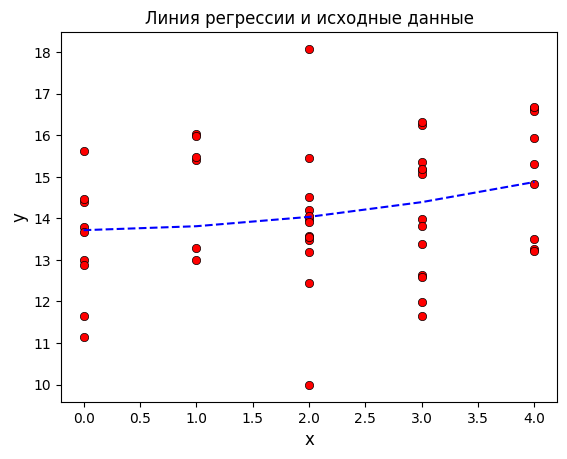

In [ ]:
X_val = np.array([3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4])
X = np.array([[1] * 50, X_val, X_val**2])
Y = np.array([11.66, 15.31, 14.39, 11.15, 13.57, 13.99, 13.38, 15.16, 12.99, 15.41, 14.20, 15.36, 12.44, 11.98, 11.65, 16.65, 15.62, 13.00, 13.80, 13.99, 13.48, 13.19, 14.82, 15.07, 15.45, 15.19, 16.26, 18.08, 14.05, 15.93, 13.68, 16.32, 13.27, 12.64, 16.59, 15.47, 9.99, 13.56, 13.82, 16.02, 15.99, 13.22, 14.46, 12.88, 14.52, 13.91, 13.50, 12.59, 13.28, 16.67])
b = np.array([13.716, 0.03, 0.065])

plt.title('Линия регрессии и исходные данные')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.scatter(X_val, Y, color='red', edgecolors='black', linewidths=0.5)

X_val = np.array(sorted([3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4]))
X = np.array([[1] * 50, X_val, X_val**2])

plt.plot(X_val, np.dot(np.transpose(X), b), '--b')
plt.show()

###**6 задание.** Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Несмещённая оценка дисперсии находится по формуле\
$ \displaystyle S^2 = \frac{RSS( \hat{\beta} )}{ n - r } = \frac{(Y - X^T \hat{\beta})^T (Y - X^T \hat{\beta})}{47} \approx 2.561$\
\
Ответ получен в результате вычислений следующей программы

In [ ]:
X_val = np.array([3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4])
X = np.array([[1] * 50, X_val, X_val**2])
Y = np.array([11.66, 15.31, 14.39, 11.15, 13.57, 13.99, 13.38, 15.16, 12.99, 15.41, 14.20, 15.36, 12.44, 11.98, 11.65, 16.65, 15.62, 13.00, 13.80, 13.99, 13.48, 13.19, 14.82, 15.07, 15.45, 15.19, 16.26, 18.08, 14.05, 15.93, 13.68, 16.32, 13.27, 12.64, 16.59, 15.47, 9.99, 13.56, 13.82, 16.02, 15.99, 13.22, 14.46, 12.88, 14.52, 13.91, 13.50, 12.59, 13.28, 16.67])
b = np.array([13.716, 0.03, 0.065])

e2 = Y - np.dot(np.transpose(X), b) #ошибки

s2 = np.dot(np.transpose(e2), e2) / 47

print("Несмещённая оценка дисперсии =", round(s2, 3))


Несмещённая оценка дисперсии = 2.561


На базе ошибок построим гистограмму с шагом $1.20$.

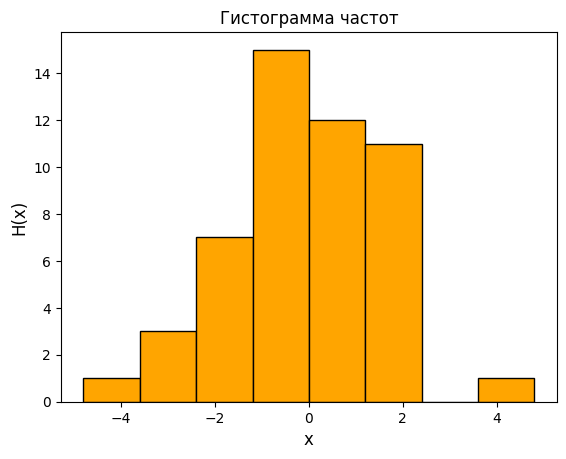

In [ ]:
plt.title('Гистограмма частот')
plt.xlabel('x', fontsize=12)
plt.ylabel('H(x)', fontsize=12)

counts, bins = np.histogram(e2, bins=[i / 100 for i in range(-480, 481, 120)])
plt.hist(bins[:-1], edgecolor='black', weights=counts, bins=bins, color='orange')
plt.show()

Проверим гипотезу нормальности ошибок. Для начала проверим, распределены ли ошибки нормально с параметрами $ a = 0 $ и $ \sigma^2 = 2.561 $.

Таблица частот \
$ \begin{array}{|c|c|} \hline i & -3.6 & -2.4 & -1.2 & 0 & 1.2 & 2.4 & 3.6 & 4.8 \\ \hline \nu_i  & 1 & 3 & 7 & 15 & 12 & 11 & 0 & 1 \\ \hline
\end{array} $

Сгруппируем данные по интевалам.\
$ \begin{array}{|c|c|} \hline j & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\ \hline I_j & (-\infty, -3.6] & (-3.6, -2.4] & (-2.4, -1.2] & (-1.2, 0] & (0, 1.2] & (1.2, 3.6] & (3.6, +\infty) \\ \hline \nu_j  & 1 & 3 & 7 & 15 & 12 & 11 &  1  \\ \hline
\end{array} $ \
\
$ \measuredangle$ Основную гипотезу $H_0: Ф(I_j) = Ф_{(0, 2.561)}(I_j)$ для всех $j=1...7$ \
и альтернативную - $ H_А: {\exists j} \ Ф(I_j) \neq Ф_{(0, 2.561)}(I_j)$, где $ j=1...7 $\
\
Вычислим результаты и структурируем их в таблице \
$ \begin{array}{|c|c|} \hline I_j & \nu_j & p_{j0} & \frac{\large \left( \nu_j -np_{j0} \right)^2}{\large np_{j0}}\\ \hline (-\infty, -3.6] & 1 & 0.01224 & 0.246 \\ \hline (-3.6, -2.4] & 3 &  0.05461 &  0.027\\ \hline (-2.4, -1.2] & 7 & 0.15983 & 0.123\\ \hline (-1.2, 0] & 15 & 0.27333 & 0.13 \\ \hline (0, 1.2] & 12 & 0.27333 & 0.203 \\ \hline (1.2, 3.6] & 11 & 0.21443 & 0.007 \\ \hline (3.6, +\infty) & 1 & 0.01224 & 0.246 \\ \hline \end{array} $ \
\
$ \chi^2 = 0.982$\
\
Расчёты получены в результате следующей программы



In [ ]:
def CuclSum(a, g):
  arr = [-3.6, -2.4, -1.2, 0, 1.2, 3.6]
  res = [0] * (len(arr) + 1)

  #Вычисление p_j0
  res[0] = sps.norm.cdf(-3.6, a, g)

  for i in range(1, len(arr)):
    res[i] = sps.norm.cdf(arr[i], a, g) - sps.norm.cdf(arr[i - 1], a, g)
  res[len(arr)] = 1 - sps.norm.cdf(3.6, a, g)
  res = [round(elem, 5) for elem in res]
  print("p_j0 =", res)
  print("Проверка результата. Сумма p_j0 =", round(sum(res), 3))

  #Вычисление X^2
  v = [1, 3, 7, 15, 12, 11, 1]
  ans = [(v[i] - 50 * res[i]) ** 2 / (50 * res[i]) for i in range(len(v))]
  ans = [round(elem, 3) for elem in ans]
  print("Последний столбец =", ans)

  return sum(ans)

print("X^2 =", round(CuclSum(0, 2.561 ** 0.5), 3))

p_j0 = [0.01224, 0.05461, 0.15983, 0.27333, 0.27333, 0.21443, 0.01224]
Проверка результата. Сумма p_j0 = 1.0
Последний столбец = [0.246, 0.027, 0.123, 0.13, 0.203, 0.007, 0.246]
X^2 = 0.982


$ x_{a} : \mathcal{K}_{r-1}(x_a) = \mathcal{K}_6(x_a) = 1 - \alpha = 1 - 0.1 = 0.9$

In [ ]:
fx = 0.9
x_a = sps.chi2.ppf(fx, 6)

print("Квантиль x_a =", round(x_a, 3))
print("Функция распределения K_6(x_a) =", sps.chi2.cdf(x_a, 6))

Квантиль x_a = 10.645
Функция распределения K_6(x_a) = 0.9


Т.к. $\chi^2 < x_\alpha$ , то гипотеза принимается. Значит можем предполагать, что $ e_1...e_n \sim \mathcal{N}(0, 2.561)$ с уровнем доверия $ 1 - \alpha. $\
Найдём наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу. Пусть $\mathbb{P}(\chi^2 \leq x_\alpha) = 0$\
Тогда $ \chi^2 \leq x_\alpha \implies \chi^2 \leq \mathcal{K}_{6}^{-1}(1 - \alpha) \implies \mathcal{K}_{6}(\chi^2) \leq 1 - \alpha \implies \alpha \leq 1 - \mathcal{K}_{6}(\chi^2)$



In [ ]:
chi2 = 0.982
print("Наибольшее значение уровня значимости =", round(1 - sps.chi2.cdf(chi2, 6), 3))

Наибольшее значение уровня значимости = 0.986


Для оценки расстояния до класса нормальных распределений по Колмогорову рассмотрим следующие гипотезы.\
Основаня гипотеза $ H_0 : e_1...e_n \sim \mathcal{N}(0, 2.561) $\
Альтернативная гипотеза $ H_А : e_1...e_n$ не распределена, как $\mathcal{N}(0, 2.561) $

Статистика критерия Колмогорова $ \widehat{D_n} = max| e_x - Ф_{(0, 2.561)}(x) | $. Построим критерий Колмогорова.\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq x_\alpha  \\ 1, \quad \widehat{D_n} > x_\alpha \end{cases}$, где $ x_\alpha: \mathcal{K_n}(x_\alpha) = 1 - \alpha = 0.9 $\
\
Найдём $ x_a $  


In [ ]:
fx = 0.9
x_a = sps.ksone.ppf(fx, 50)


print("При квантиле x_a =", round(x_a, 3))
print("Функция распределения Колмогорова K_50(x_a) =", round(sps.ksone.cdf(x_a, 50), 3))

При квантиле x_a = 0.148
Функция распределения Колмогорова K_50(x_a) = 0.9


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.148  \\ 1, \quad \widehat{D_n} > 0.148 \end{cases}$

Найдём $\widehat{D_n}$

In [ ]:
def Fn(x):
  e2 = [-2.731, 0.434, 0.674, -2.566, -0.466, -0.401, -1.011, 0.769, -0.821, 1.599, 0.164, 0.969, -1.596, -2.411, -2.066, 1.774, 1.904, -0.716, 0.084, -0.046, -0.556, -0.846, -0.056, 0.679, 1.414, 0.799, 1.869, 4.044, 0.014, 1.054, -0.036, 1.929, -1.606, -1.751, 1.714, 1.659, -4.046, -0.476, -0.571, 2.209, 2.179, -1.656, 0.744, -0.836, 0.484, -0.126, -1.376, -1.801, -0.531, 1.794]


  sm = 0
  for i in range(50):
    if e2[i] < x:
      sm += 1
  return sm / 50

x_val = np.arange(-5, 5, 0.001)

Dn_array = [abs(Fn(x) - sps.norm.cdf(x, 0, 2.561 ** 0.5)) for x in x_val]

print("Статистика Dn =", round(max(Dn_array) * 50 ** 0.5, 3))

Статистика Dn = 0.451


Т.к. $\widehat{D_n} > x_\alpha$, гипотеза $H_0$ отвергается.\
Найдём наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу. Пусть $\mathbb{P}(D_n \leq x_\alpha) = 0$\
Тогда $ D_n \leq x_\alpha \implies D_n \leq \mathcal{K}_{50}^{-1}(1 - \alpha) \implies \mathcal{K}_{50}(D_n) \leq 1 - \alpha \implies \alpha \leq 1 - \mathcal{K}_{50}(D_n)$


In [ ]:
Dn = 0.451
print("Наибольшее значение уровня значимости =", 1 - sps.ksone.cdf(Dn, 50))

Наибольшее значение уровня значимости = 4.189335545135009e-10


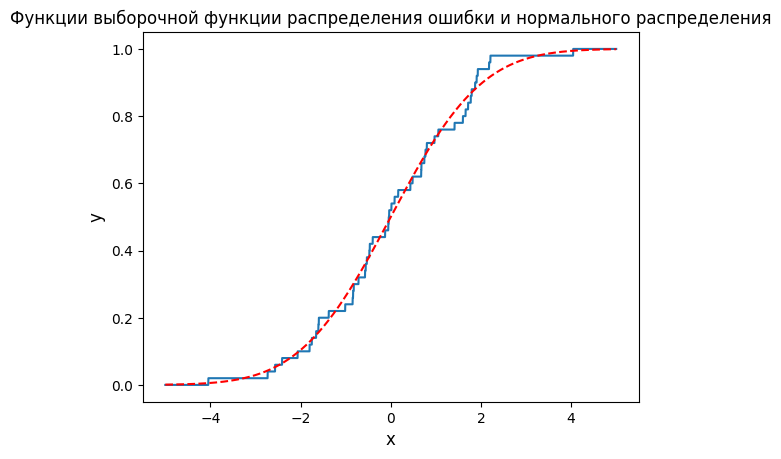

In [ ]:
def Fn(x):
  e2 = [-2.731, 0.434, 0.674, -2.566, -0.466, -0.401, -1.011, 0.769, -0.821, 1.599, 0.164, 0.969, -1.596, -2.411, -2.066, 1.774, 1.904, -0.716, 0.084, -0.046, -0.556, -0.846, -0.056, 0.679, 1.414, 0.799, 1.869, 4.044, 0.014, 1.054, -0.036, 1.929, -1.606, -1.751, 1.714, 1.659, -4.046, -0.476, -0.571, 2.209, 2.179, -1.656, 0.744, -0.836, 0.484, -0.126, -1.376, -1.801, -0.531, 1.794]

  sm = 0
  for i in range(50):
    if e2[i] < x:
      sm += 1
  return sm / 50

x_val = np.arange(-5, 5, 0.001)
y_err = [Fn(x) for x in x_val]
y_norm = [sps.norm.cdf(x, 0, 2.52 ** 0.5) for x in x_val]

plt.title('Функции выборочной функции распределения ошибки и нормального распределения')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.plot(x_val, y_err)
plt.plot(x_val, y_norm, '--r')
plt.show()

### **Задание 7.** В предположении нормальности ошибок построить доверительные интервалы для параметров  $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$.

Для построения доверительного интервала воспользуемся фактом, что $\displaystyle \frac{\hat{\psi} - \psi}{s \sqrt{b}} \sim S_{n - r} $, где\
$ \hat{\psi} = C^T \hat{\beta} \quad b_\psi = C^T (X X^T)^{-1} C$. $C$ - матрица для опеределения параметров, которые будут оценены. В случае, если нужно оценить каждый параметр отдельно, берутся $ C_0 = \left( \begin{array}{c} 1 \\ 0 \\ 0 \end{array} \right); \quad C_1 = \left( \begin{array}{c} 0 \\ 1 \\ 0 \end{array} \right); \quad C_2 = \left( \begin{array}{c} 0 \\ 0 \\ 1 \end{array} \right) $ \
$ \hat{\psi_0} = \left( \begin{array}{c} 1 & 0 & 0 \end{array} \right) \left( \begin{array}{c} 13.716 \\ 0.03 \\ 0.065 \end{array} \right) = 13.716 $\
\
$ \hat{\psi_1} = \left( \begin{array}{c} 0 & 1 & 0 \end{array} \right) \left( \begin{array}{c} 13.716 \\ 0.03 \\ 0.065 \end{array} \right) = 0.03 $\
\
$ \hat{\psi_2} = \left( \begin{array}{c} 0 & 0 & 1 \end{array} \right) \left( \begin{array}{c} 13.716 \\ 0.03 \\ 0.065 \end{array} \right) = 0.065 $\
\
$b_{\psi_0} = C_0^T (X X^T)^{-1} C_0 = 0.1$\
$b_{\psi_1} = C_1^T (X X^T)^{-1} C_1 = 0.121$\
$b_{\psi_2} = C_2^T (X X^T)^{-1} C_2 = 0.121$\
\
Полученные результаты вычисляются следующей программой

In [ ]:
X_val = np.array([3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4])
X = np.array([[1] * 50, X_val, X_val**2])

XXT = np.dot(X, np.transpose(X))

#Вычисление b_psi0
C0 = np.array([1, 0, 0])
bp0 = np.dot(np.dot(np.transpose(C0), np.linalg.inv(XXT)), C0)
print("b_psi0 =",  round(bp0, 3))

#Вычисление b_psi1
C1 = np.array([0, 1, 0])
bp1 = np.dot(np.dot(np.transpose(C1), np.linalg.inv(XXT)), C1)
print("b_psi1 =", round(bp1, 3))

#Вычисление b_psi2
C2 = np.array([0, 0, 1])
bp2 = np.dot(np.dot(np.transpose(C2), np.linalg.inv(XXT)), C2)
print("b_psi12 =", round(bp1, 3))

b_psi0 = 0.1
b_psi1 = 0.121
b_psi12 = 0.121


Тогда доверительный интервал будет выглядеть, как\
$ \psi \in \left[ \hat{\psi} - x_\alpha S \sqrt{b_\psi}, \hat{\psi} + x_\alpha S \sqrt{b_\psi} \right] $, где $\displaystyle x_\alpha : S_{n - r} = S_{47} = 1 - \frac{\alpha}{2} =  0.95$

In [ ]:
fx = 0.95
x_a = sps.t.ppf(fx, 47)


print("При квантиле x_a =", round(x_a, 3))
print("Функция распределения S_48(x_a) =", round(sps.t.cdf(x_a, 47), 3))

При квантиле x_a = 1.678
Функция распределения S_48(x_a) = 0.95


Найдём доверительный интервал для $\beta_0$, для $\beta_1$ и для $\beta_2$.

In [ ]:
print("Доверительный интервал b0 от", round(13.716 - 1.678 * (2.561 * 0.1) ** 0.5, 3), "до", round(13.716 + 1.678 * (2.561 * 0.1) ** 0.5, 3))
print("Доверительный интервал b1 от", round(0.03 - 1.678 * (2.561 * 0.0121) ** 0.5, 3), "до", round(0.03 + 1.678 * (2.561 * 0.0121) ** 0.5, 3))
print("Доверительный интервал b2 от", round(0.065 - 1.678 * (2.561 * 0.0121) ** 0.5, 3), "до", round(0.065 + 1.678 * (2.561 * 0.0121) ** 0.5, 3))

Доверительный интервал b0 от 12.867 до 14.565
Доверительный интервал b1 от -0.265 до 0.325
Доверительный интервал b2 от -0.23 до 0.36


$ \beta_0 \in \left[ 12.867, 14.565 \right] $\
$ \beta_1 \in \left[ -0,265, 0.325 \right] $\
$ \beta_2 \in \left[ -0.23, 0.36 \right] $


Построим доверительный эллипс для параметров $( \beta_0, \beta_1, \beta_2 )$.\
$ A_\alpha = \{ \vec{x} : ( \vec{x} - \hat{\psi} )^T B^{-1} ( \vec{x} - \hat{\psi} ) \leq q S^2 x_\alpha \} $, где $ q = dim(\vec{x}); \quad x_\alpha : \mathcal{F_{q,n-r}}(x_\alpha) = 1 - \alpha; \quad B = C^T (X X^T)^{-1} C$\
Для построение требуемого эллипса берём матрицу $C = \left( \begin{array}{c} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right) = E$.\
Тогда матрица $B = (X X^T)^{-1} \implies B^{-1} = X X^T$\
\
Найдём $x_\alpha$


In [ ]:
fx = 0.9
x_a = sps.f.ppf(fx, 3, 47)


print("При квантиле x_a =", round(x_a, 3))
print("Функция распределения Фишера-Синдекора F_3_47(x_a) =", round(sps.f.cdf(x_a, 3, 47), 3))

При квантиле x_a = 2.204
Функция распределения Фишера-Синдекора F_3_47(x_a) = 0.9


Приведём уравнение эллипса к каноническому виду для нахождения полуосей.
$(\vec{x} - \hat{\psi} )^T B^{-1} ( \vec{x} - \hat{\psi} ) = \left( \left( \begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array} \right) - \left( \begin{array}{c} 13.716 \\ 0.03 \\ 0.065 \end{array} \right) \right)^T X X^T \left( \left( \begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array} \right) - \left( \begin{array}{c} 13.716 \\ 0.03 \\ 0.065 \end{array} \right) \right)$\
$= \left( \begin{array}{c} \beta_0 -  13.716 \\ \beta_1 - 0.03 \\ \beta_2 - 0.065 \end{array} \right)^T \left( \begin{array}{c} 50 & 107 & 319 \\ 107 & 319 & 1037 \\ 319 & 1037 & 3571 \end{array} \right) \left( \begin{array}{c} \beta_0 -  13.716 \\ \beta_1 - 0.03 \\ \beta_2 - 0.065 \end{array} \right)$\
\
Сделаем параллельный перенос в центр координат\
$ \beta_0 -  13.716 = \bar{\beta_0} \quad \beta_1 - 0.03 = \bar{\beta_1} \quad \beta_2 - 0.065 = \bar{\beta_2} $\
$\left( \begin{array}{c} \bar{\beta_0} \\ \bar{\beta_1} \\ \bar{\beta_2} \end{array} \right)^T \left( \begin{array}{c} 50 & 107 & 319 \\ 107 & 319 & 1037 \\ 319 & 1037 & 3571 \end{array} \right) \left( \begin{array}{c} \bar{\beta_0} \\ \bar{\beta_1} \\ \bar{\beta_2} \end{array} \right)$\
\
Воспользуемся ортогональным преобразованием (таким образом сохраним длины и скалярные произведения).\
 Перепишем коэффициенты квадратичной формы в матрицу.\
$ A = \left( \begin{array}{c} 50 & 107 & 319 \\ 107 & 319 & 1037 \\ 319 & 1037 & 3571 \end{array} \right) $\
\
Найдём собственные числа.\
$ \left| \begin{array}{c} 50 - \lambda & 107 & 319 \\ 107 & 319 - \lambda & 1037 \\ 319 & 1037 & 3571 - \lambda \end{array} \right| = 0$\
\
$ \lambda_1 x^2 + \lambda_2 y^2 + \lambda_3 z^2 \leq q S^2 x_\alpha$\
$ 5.073 x^2 + 32.055 y^2 + 3902.872 z^2 \leq 16,93$\
$ 0.3x^2 +  1,893y^2 + 230,53z^2 \leq 1$\
\
Полуоси\
$ a = \frac{1}{\sqrt{0.3}} = 1.826$\
$ b = \frac{1}{\sqrt{1.893}} = 0.727$\
$ b = \frac{1}{\sqrt{230.53}} = 0.066$




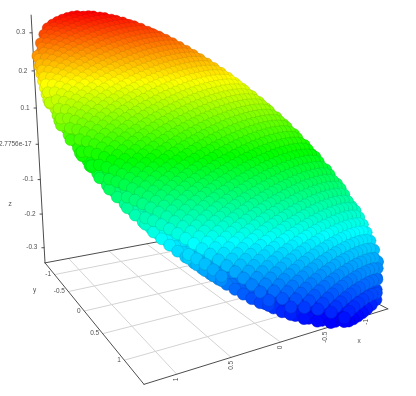

### **Задание 8.** Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.



Y зависит от X, если $ y_i \approx \beta_0 + \beta_1 x_i + \beta_2 x_i^2$\
То есть $ \beta_1 \neq 0$ и $ \beta_2 \neq 0 $

ДНО-функция $ \psi = C^T \beta $. Выделим параметры $ ( \beta_1, \beta_2 ) $\
$ C = \left( \begin{array}{c} 0 & 0 \\ 1 & 0 \\ 0 & 1 \end{array} \right) \implies \psi = \left( \begin{array}{c} 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right) \left( \begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array} \right) = ( \beta_1, \beta_2 )$\
\
Рассмотрим основную гипотезу $ H_0: \psi = 0 \ $\
Альтернативной будет гипотеза $ H_A: \psi \neq 0 $, то есть существует линейная регрессионая зависимость Y от X\
Тогда статистика будет выглядеть, как\
$\displaystyle \mathbb{F} = \frac{\hat{\psi}^T (C^T (X X^T)^{-1} C)^{-1} \hat{\psi}}{q S^2} \sim \mathcal{F}_{q, n-r} $,\
где $ x_\alpha : F_{q, n-r}(x_\alpha) = 1 - \alpha = 0.9 $\
\
Найдём $x_\alpha$


In [ ]:
fx = 0.9
x_a = sps.f.ppf(fx, 2, 47)


print("При квантиле x_a =", round(x_a, 3))
print("Функция распределения Фишера-Синдекора F_2_47(x_a) =", round(sps.f.cdf(x_a, 2, 47), 3))

При квантиле x_a = 2.419
Функция распределения Фишера-Синдекора F_2_47(x_a) = 0.9


Построим критерий\
$ \varphi = \begin{cases} 0 \quad \mathbb{F} \leq 2.419 \\ 1 \quad \mathbb{F} > 2.419 \end{cases} $\
\
Найдём статистику $ \mathbb{F} $\
\
МНК-оценка $ \hat{\psi} = C^T \hat{\beta} = \left( \begin{array}{c} 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right) \left( \begin{array}{c} 13.716 \\ 0.03 \\ 0.065  \end{array} \right) = \left( \begin{array}{c} 0.03 & 0.065  \end{array} \right)$


In [ ]:
C = np.array([[0, 0], [1, 0], [0, 1]])
psi_hat = np.array([0.03, 0.065])
X_val = np.array([3, 4, 0, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 0, 4, 0, 0, 0, 2, 2, 2, 4, 3, 2, 3, 3, 2, 2, 4, 0, 3, 4, 3, 4, 1, 2, 2, 3, 1, 1, 4, 0, 0, 2, 2, 4, 3, 1, 4])
X = np.array([[1] * 50, X_val, X_val**2])
q = 3
S2 = 2.561

XXT = np.dot(X, np.transpose(X))
CTXXTC = np.dot(np.dot(np.transpose(C), np.linalg.inv(XXT)) , C)

print("Статистика F =", round(np.dot(np.dot(np.transpose(psi_hat), np.linalg.inv(CTXXTC)), psi_hat) / (q * S2), 3) )

Статистика F = 1.035


Т.к. $\mathbb{F} < x_\alpha$, гипотеза $H_0$ принимается.\
Найдём наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу. Пусть $\mathbb{P}(\mathbb{F} \leq x_\alpha) = 0$\
Тогда $ \mathbb{F} \leq x_\alpha \implies \mathbb{F} \leq \mathcal{F}_{1, 48}^{-1}(1 - \alpha) \implies \mathcal{F}_{2, 47}(\mathbb{F}) \leq 1 - \alpha \implies \alpha \leq 1 - \mathcal{F}_{2, 47}(\mathbb{F})$


In [ ]:
F = 1.035
print("Наибольшее значение уровня значимости =", round(1 - sps.f.cdf(F, 2, 47), 3))

Наибольшее значение уровня значимости = 0.363


## Выводы

В ходе данной лабораторной работы была разобрана тема линейное регрессии. Был изучен метод для оценки параметров построеных моделей, такой как МНК. На построенных графиках видно пунктов 1 и 5 видно, как прямые по-разному пытаются описывать предложенную выборку. Были построены оценки параметров с помощью доверительных интервалов и эллипсоидов. А также были рассмотрены несколько гипотез. Из них были приянты такие гипотезы, как нормальность ошибок и линейная независимость Y от X. Но были отвергнуты гипотезы нормальности ошибок по Колмогорову.  